# Prueba 3.2: Análisis de los crímenes en la Ciudad de Nueva York
## Hito 1

● Desarrollar secciones:

○ Preliminares
○ Aspectos Computacionales
○ Análisis Exploratorio
○ Feature Engineering (iniciar desarrollo).

Requerimientos:

● El enunciado debe estar clarificado, considerando el tipo de problema a resolver. Se
deben considerar las librerías a implementar. (1 Punto)

● El tipo de métricas a implementar, ¿Qué estrategia de división de muestras?, ¿Qué
tipo de preprocesamiento se implementará? (2 Puntos)

● Declarar por lo menos cinco modelos con una grilla de hiperparámetros tentativa. (2 Puntos)

● Se debe analizar el comportamiento del vector objetivo. (2 Puntos)

● Se debe reportar el patrón de datos perdidos. (1 Punto)

● Se debe implementar recodificaciones para el vector objetivo. (2 Puntos)

● Entregable: Un notebook con todos los puntos detallados. De ser necesario, un
archivo con extensión .py que contenga todas las funciones auxiliares.


## Preliminares
En esta ocasión trabajaremos con datos públicos del departamento de policía de New York.
El dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones
y detenciones realizadas por el departamento de policía de NY en la vía pública.

El diccionario de atributos se encuentra en el archivo 2009 SQF File Spec.xls.
Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como
conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas.

Hay que hacer notar que los datos que estamos utilizando son un muestreo de la cantidad de registros
reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de
entrenamiento y procesamiento que requiere el volumen de datos reales.


### Objetivo General: 
* Generar un modelo que prediga si el procedimiento policial concluirá en un arresto o no, condicional a las características medidas del sospechoso.
* Generar un modelo predictivo que permita determinar si el procedimiento policial concluirá en alguna acción violenta.

## Objetivos

Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
1. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos
perdidos y presente su esquema de recodificación. Tenga presente que lo que
observe en el análisis exploratorio debe guiar su proceso de ingeniería de atributos,
por lo que se le recomienda que piense en aspectos de las variables involucradas
que puedan afectar el proceso mencionado.
2. Reporte la probabilidad de que un individuo sea arrestado en uno de los cinco
barrios, condicional al género y a la raza. Concluya, ¿qué implicancias éticas tienen
algunas conclusiones de lo que observa?.
3. Entregue un modelo predictivo que prediga efectivamente si un determinado
procedimiento concluirá en un arresto o no. Para ello, guíate por los siguientes
lineamientos:
○ Entrene por lo menos 3 modelos que sean capaces de predecir si se
producirá un arresto o no. Una vez que encuentre un modelo satisfactorio,
reporte al menos dos métricas de desempeño.
○ Refine aquellos atributos relevantes con alguna estrategia que crea
conveniente y reporte por lo menos 5 atributos relevantes para realizar la
predicción.
4. Genere al menos cinco modelos predictivos que permitan determinar si el
procedimiento policial concluirá en alguna acción violenta.
○ Para ello, debe generar un nuevo atributo como vector objetivo que indique
cuándo hubo violencia o no. Éste debe ser creado a partir de atributos
existentes que indiquen el tipo de violencia.
5. Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que
el modelo serializado debe ser posterior al fit, para poder ejecutar predict en los
nuevos datos.

### El Análisis de Predicción es del tipo Clasificación.

La clasificación supervisada es una de las tareas que más frecuentemente son llevadas a cabo por los denominados Sistemas Inteligentes. Por lo tanto, un gran número de paradigmas desarrollados bien por la Estadística (Regresión Logística, Análisis Discriminante) o bien por la Inteligencia Artificial (Redes Neuronales, Inducción de Reglas, Árboles de Decisión, Redes Bayesianas) son capaces de realizar las tareas propias de la clasificación.

Para resolver este problema implementaremos los métodos estadísticos: el Análisis Discriminantes y los K vecinos próximos, y los Arboles de Decisión, las Máquinas Soporte Vector, Redes Neuronales y el Clasificador Bayesiano desarrollados por la Inteligencia Artificial.

Un paso previo a aplicar un método de clasificación, es la partición del conjunto de datos en dos conjuntos de datos más pequeños que serán utilizadas con los siguientes fines: entrenamiento y test .

El subconjunto de datos de entrenamiento es utilizado para estimar los parámetros del modelo y el subconjunto de datos de test se emplea para comprobar el comportamiento del modelo estimado. 

Cada registro de la base de datos debe de aparecer en uno de los dos subconjuntos, y para dividir el conjunto de datos en ambos subconjuntos, se utiliza un procedimiento de muestreo: muestreo aleatorio simple o muestreo estratificado. Lo ideal es entrenar el modelo con un conjunto de datos independiente de los datos con los que realizamos el test.

Como resultado de aplicar un método de clasificación, se cometerán dos errores, en el caso de una variable binaria que toma valores 0 y 1, habrá ceros que se clasifiquen incorrectamente como unos y unos que se clasifiquen incorrectamente como ceros.

## Tipos de Variables:

#### Categóricas:

recstat: Estado del registro (Cualitativa Nominal Binaria)
inout: Fue detenido adentro o afuera (Cualitativa Nominal de 2 Categorías)
trhsloc: Lugar de detención (Cualitativa Nominal de 4 Categorías)
crimsusp: Sospecha del delito ()
typeofid: Tipo de identificación de la persona detenidad(Cualitativa Nominal de 4 Categorías)
explnstp: El oficial explica la razón de la detención (Cualitativa Nominal Binaria)
othpers: Fueron detenidas otras personas (Cualitativa Nominal Binaria)
arstoffn: Sospecha del delito arrestado ()
sumissue: Se omitio una citativa (Cualitativa Nominal Binaria)
sumoffen: Sospecha del delito por el cual fue arrestado ()
offunif: Estaba el oficial en uniforme (Cualitativa Nominal Binaria)
officrid: Tarjeta de identificación proporcionada por el oficial (Cualitativa Nominal Binaria)
frisked: El sospechoso es registrado (Cualitativa Nominal Binaria)
searched: Fue buscado el sospechoso (Cualitativa Nominal Binaria)
adtlrept: Se prepararron informes adicionales (Cualitativa Nominal 1 categoría)
pistol: Se encontró una pistola al sospechoso (Cualitativa Nominal Binaria)
riflshot: Se encontró un rifle al sospechoso (Cualitativa Nominal Binaria)
asltweap: Se encontró un arma al sospechoso (Cualitativa Nominal Binaria)
knifcuti: Se encontró un cuchillo o un arma cortante al sospechoso (Cualitativa Nominal Binaria)
machgun: Se encontró una ametralladora al sospechoso (Cualitativa Nominal Binaria)
othrweap: Se encontró otro tipo de arma al sospechoso (Cualitativa Nominal Binaria)
pf_hands: Fuerza física usada por el oficial-Manos (Cualitativa Nominal Binaria)
pf_wall: Fuerza física usada por el oficial-Sospechoso en tierra (Cualitativa Nominal Binaria)
pf_grnd: Fuerza física usada por el oficial-Sospechoso contra la pared (Cualitativa Nominal Binaria)
pf_drwep: Fuerza física usada por el oficial-Arma (Cualitativa Nominal Binaria)
pf_ptwep: Fuerza física usada por el oficial-Arma en punta (Cualitativa Nominal Binaria)
pf_baton: Fuerza física usada por el oficial-Bastón (Cualitativa Nominal Binaria)
pf_hcuff: Fuerza física usada por el oficial-Esposas (Cualitativa Nominal Binaria)
pf_pepsp: Fuerza física usada por el oficial-Spray de primienta (Cualitativa Nominal Binaria)
pf_other: Fuerza física usada por el oficial-Otros (Cualitativa Nominal Binaria)
radio: Funcionamiento de radio (Cualitativa Nominal Binaria)
ac_rept: Circunstancias adicionales-denuncia de la víctima/testigo/funcionario (Cualitativa Nominal Binaria)
ac_inves: Circunstancias adicionales-investigación en curso (Cualitativa Nominal Binaria)
rf_vcrim: Motivo del registros-Sospecha de delito violento (Cualitativa Nominal Binaria)
rf_othsw: Motivo del registros-Otra sospecha de armas (Cualitativa Nominal Binaria)
ac_proxm: Motivo del registros-Proximidad a la escena del delito (Cualitativa Nominal Binaria)
rf_attir: Razón del arresto-Vestimenta inapropida a la temporada (Cualitativa Nominal Binaria)
cs_objcs: Motivo de la detención-Portar objeto sospechoso (Cualitativa Nominal Binaria)
cs_descr: Motivo de la detención-Se ajusta a un procedimiento de rutina (Cualitativa Nominal Binaria)
cs_casng: Motivo de la detención-Casaje de una víctima (Cualitativa Nominal Binaria)
cs_lkout: Motivo de la detención-Sospechoso que actúa como vigilante(Cualitativa Nominal Binaria)
rf_vcact: Motivo del registros-Acciones de involucrarse con un delito violento (Cualitativa Nominal Binaria)
cs_cloth: Motivo de la detención-Vestir ropa comunmente en un delito (Cualitativa Nominal Binaria)
cs_drgtr: Motivo de la detención-Acciones indicativas de una transacción de medicamentos (Cualitativa Nominal Binaria)
ac_evasv: Circunstancias adicionales- Respuesta evasiva a las preguntas (Cualitativa Nominal Binaria)
ac_assoc: Circunstancias adicionales- Asociación con delicuentes conocidos (Cualitativa Nominal Binaria)
cs_furtv: Motivo de parada-Movimientos Furtivos (Cualitativa Nominal Binaria)
rf_rfcmp: Motivo del registro-Negarse a cumplir las instrucciones del oficial (Cualitativa Nominal Binaria)
ac_cgdir: Circunstancias adicionales- Cambio de dirección a la vista del oficial (Cualitativa Nominal Binaria)
rf_verbl: Motivo del registros-Amenzas verbales del sospechoso (Cualitativa Nominal Binaria)
cs_vcrim: Motivo de la detención-Acciones de detención en un delito violento (Cualitativa Nominal Binaria)
cs_bulge: Motivo de la detención-Exaltación sospechosa (Cualitativa Nominal Binaria)
cs_other: Motivo de la detención-Otros (Cualitativa Nominal Binaria)
ac_incid: Circunstancias adicionales- Área tiene alta incidencia delictiva (Cualitativa Nominal Binaria)
ac_time: Circunstancias adicionales- La hora del delito se ajusta a la incidencia del delito (Cualitativa Nominal Binaria)
rf_knowl: Motivo de la detención-Conocimiento del coportamiento del delito anterior delsospechoso (Cualitativa Nominal Binaria)
ac_stsnd: Circunstancias adicionales-Vistas o sonidos de actividad delictiva (Cualitativa Nominal Binaria)
ac_other: Circunstancias adicionales-Otro(Cualitativa Nominal Binaria)
sb_hdobj: Base de busqueda-Objeto duro (Cualitativa Nominal Binaria)
sb_outln: Base de busqueda-Esquema del arma (Cualitativa Nominal Binaria)
sb_admis: Base de busqueda-Admisión por sospechoso (Cualitativa Nominal Binaria)
sb_other: Base de busqueda-Otros (Cualitativa Nominal Binaria)
rf_furt: Motivo del Chequeo-Movimientos Furtivos (Cualitativa Nominal Binaria)
rf_bulg: Motivo del Chequeo-Bulto sospechoso (Cualitativa Nominal Binaria)
offverb: Declaración verbal proporcionada por el oficial (Cualitativa Nominal Binaria)
offshld: Escudo proporcionado por el oficial (Cualitativa Nominal Binaria)
sex: Sexo del sospechoso (Cualitativa Nominal Binaria)
race: Raza del sospechoso (Cualitativa Nominal Binaria)
haircolr: Color del pelo del sospechoso (Cualitativa Nominal de 11 categorías)
eyecolor: Color de los ojos del sospechoso (Cualitativa Nominal de 11 categorías)
othfeatr: Otras características del sospechoso-Cicatrices, tatuajes, etc (Cualitativa Nominal 1 categoría)
addrtyp: Domicilio de la persona detenida-tipo de dirección (Cualitativa Nominal 1 categoría)
rescode: Ubicación de la detencción-código de residencia (Cualitativa Nominal 1 categoría)
premtype: Ubicación de la detencción-tipo del local(Cualitativa Nominal 1 categoría)
addrnum: Ubicación de la detencción-Número de dirección(Cualitativa Nominal varias categorías)
stname: Ubicación de la detencción-Nombre de la calle (Cualitativa Nominal varias categorías)
stinter: Ubicación de la detencción-Intersección(Cualitativa Nominal varias categorías)
crossst: Ubicación de la detencción-Cruce(Cualitativa Nominal varias categorías)
aptnum: Ubicación de la detencción-Número de apartamento(Cualitativa Nominal 1 categoría)
city: Ubicación de la detencción-Ciudad(Cualitativa Nominal 5 categorías)
state: Ubicación de la detencción-Estado(Cualitativa Nominal 1 categoría)
zip: Ubicación de la detencción-Código postl(Cualitativa Nominal 1 categoría)
sector: Ubicación de la detencción-Sector(Cualitativa Nominal varias categorías)
beat: Ubicación de la detencción-Abatimiento(Cualitativa Nominal varias categorías)
post: Ubicación de la detencción-¿Poste?(Cualitativa Nominal varias categorías)
xcoord: Ubicación de la detencción-Coordenadas x(Cualitativa Nominal varias categoría)
ycoord: Ubicación de la detencción-Coordenadas y(Cualitativa Nominal varias categoría)
dettypcm: Detalles tipo código (Cualitativa Nominal 1 categoría)

#### Numéricas:

year: Año de detención (Cuantitativa Discreta)
pct: Recinto de detención (Cuantitativa Discreta)
ser_num: Número de serie UF250 (Cuantitativa Discreta)
datestop: Fecha de detención (Cuantitativa Discreta)
timestop: Hora de detención (Cuantitativa Discreta).
perstop: Perido de detención (Cuantitativa Discreta)
compyear: Año de la denuncia (Cuantitativa Discreta)
comppct: Precinto de la denuncia? (Cuantitativa Discreta)
repcmd: Comando del oficial informante (Cuantitativa Discreta)
revcmd: Mando del oficial revisor (Cuantitativa Continua).
dob: Fecha de nacimiento del sospechoso (Cuantitativa Discreta)
age: Edad del sospechoso (Cuantitativa Discreta)


### Refinación y Pre-procesamiento de las palabras

Análisis de datos perdidos: Se realiza exploración básica de datos faltantes.


### Preparación del vector objetivo y las matrices de entrenamiento y validación:

Revisaremos el comportamiento de 'arstmade' que considera la cantidad de arrestos concluidos.
Y generaaremos el otro vecor objetivo 'violence' que nos indicará cuando un arresto fue catalogado como violento o no. Para generar este vector objetivo se tomarán en cuenta las variables:
pf_hands: Fuerza física usada por el oficial-Manos (Cualitativa Nominal Binaria)
pf_wall: Fuerza física usada por el oficial-Sospechoso en tierra (Cualitativa Nominal Binaria)
pf_grnd: Fuerza física usada por el oficial-Sospechoso contra la pared (Cualitativa Nominal Binaria)
pf_drwep: Fuerza física usada por el oficial-Arma (Cualitativa Nominal Binaria)
pf_ptwep: Fuerza física usada por el oficial-Arma en punta (Cualitativa Nominal Binaria)
pf_baton: Fuerza física usada por el oficial-Bastón (Cualitativa Nominal Binaria)
pf_hcuff: Fuerza física usada por el oficial-Esposas (Cualitativa Nominal Binaria)
pf_pepsp: Fuerza física usada por el oficial-Spray de primienta (Cualitativa Nominal Binaria)
pf_other: Fuerza física usada por el oficial-Otros (Cualitativa Nominal Binaria)


### Análisis Exploratorio:

#### Descriptivo:

Se calcularon frecuencias relativas (Porcentaje) de los vectores objetivos obteniendo las distribuciones de las variables de interés.

#### Predictivo:

Para abordar el desafío de generar un modelo que nos permita predecir con la mayor exactitud posible si un determinado procedimiento policial concluirá en arresto o no, se decidió implementar 5 modelos de clasificación, de los cuales 4 de ellos fueron vistos en clases y 1 investigado por nuestra parte, entre estos tenemos:

* Modelo1 __XGBoost__: Es una variante del modelo Gradient Boosting optimizado para problemas y herramientas modernas de ciencia de datos. Algunos de los principales beneficios de XGBoost son que es altamente escalable / paralelo, rápido de ejecutar y normalmente supera a otros algoritmos.

* MOdelo2 __Support Vector Machine__: Nos permite utilizar las llamadas funciones Kernel (no lineales). Estas resuelven el problema de clasificación trasladando los datos a un espacio donde el hiperplano solución es lineal y, por tanto, más sencillo de obtener. Una vez conseguido, la solución se transforma, de nuevo, al espacio original.

* Modelo3__Random Forest Classifier__: modelo el cual es una combinación de árboles predictores, tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos, construye una larga colección de árboles no correlacionados y luego los promedia.

* MOdelo4__BernoulliNB__: este clasificador es adecuado para datos discretos y funciona con recuentos de ocurrencias, se elige dado que está especialmente diseñado para funciones binarias / booleanas.

* Modelo5__Regresión Logistica__: Método estadístico para predecir clases binarias, si bien es uno de los algoritmos más simples, tambien es uno de los más utilizados.

*Modelos predictivos sujeto a modificación, veremos en la implementación como se desarrolla cada modelo.

## Grillas que implementaremos

1. XGBoost
xgboost = XGBClassifier(n_jobs=-1)
param_grid_xgb = {'learning_rate': np.arange(.10, .12, .005), 
                  'max_depth': [3, 4, 5, 6], 
                  'n_estimators': [50, 60, 70, 80]}

grid_xgb = GridSearchCV(xgboost, param_grid_xgb, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_xgb, X_train, y_train, X_test, y_test)

2. DecisionTreeClassifier: params = {'min_samples_split': [5,7,10],'criterion': ['gini', 'entropy'],
                  'max_depth': [10,20,30],'min_samples_leaf':[0.1,0.3,0.5]}
                  
3. SVC:  params = {'kernel': ['linear','rbf'], 'C': [0.0001, 0.01, 1, 10, 100, 1000],
                  'gamma': [0.0000001, 0.001, 0.01, 1, 10]}
        
4. LogisticRegression: params = {'max_iterint': [100,150]}

    
5. RandomForestClassifier: 
forest_clf = RandomForestClassifier(random_state=1234) 
param_grid_rf = {'n_estimators': [500, 600, 700], 'max_depth': [5, 9, 12, 13], 'oob_score': [True]} 
grid_rf = GridSearchCV(forest_clf, param_grid_rf, n_jobs=-1, cv=strat)
fn.clf_metrics(grid_rf, X_train, y_train, X_test, y_test)

#### Métricas de desempeño:
Accuracy (exactitud): Esta métrica apunta a evaluar de manera global el desempeño del modelo. Entrega información de los casos bien clasificados (VP:verdaderos positivos + VN: verdaderos negativos), sobre el total de casos.
𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦=𝑉𝑃+𝑉𝑁𝑉𝑃+𝑉𝑁+𝐹𝑃+𝐹𝑁
 
Precisión: Responde a la pregunta ¿Qué proporción de identificaciones positivas fue la correcta?
𝑃𝑟𝑒𝑐𝑖𝑠𝑖ó𝑛=𝑉𝑃𝑉𝑃+𝐹𝑃
 
Recall (sensibilidad): Responde a la pregunta ¿Qué proporción de positivos reales pudo identificar correctamente el modelo confeccionado?
𝑅𝑒𝑐𝑎𝑙𝑙=𝑉𝑃𝑉𝑃+𝐹𝑁
 
F1: Es una métrica que permite obtener un "balance" entre la precisión alcanzada por el modelo y la sensibilidad del mismo.

Curva ROC: Aproximación gráfica para evaluar el desempeño del modelo. Representa la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1-especificidad).


## Aspectos computacionales

In [72]:
## Aspectos Computacionales
%matplotlib inline
#Librerías importación
import glob, os
#importamos warnings para ignorar los avisos de deprecación
import warnings
warnings.filterwarnings('ignore')
# Librería para serialización
import pickle

#imprtamos las librerias clásicas para el análisis de datos:
import pandas as pd
import numpy as np
import random
from scipy import stats

#Importamos librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

# Función para preprocesar la base
from preproc_nyc_sqf import create_suitable_dataframe

# Clase para realizar busqueda de grilla con validación cruzada y estratificación de la muestra
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#con Count vectorizer podremos ver la frecuencia de ocurrencia de las palabras
from sklearn.feature_extraction.text import CountVectorizer
#con TFIDF veremos la frecuencia de ocurrencia del término en la colección de documentos
from sklearn.feature_extraction.text import TfidfVectorizer

# Para a utilizar en el Pipeline y Preproceso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Con train test split haremos las matrices de entrenamiento y validación
from sklearn.model_selection import train_test_split, GridSearchCV

#Librerías de los modelos que utilizaremos (sujeto a modificación)
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Para el reporte de métricas
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc, classification_report 
#para importar archivos auxiliares desde otras carpetas
import sys
# Importación de funciones creadas 
import funciones as fn

#sys.path.append('../../utils')
#import lec8_graphs as afx

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Preprocesamiento de Datos

In [2]:
# Importamos el archivo del 2009 para el train y el archivo del 2010 para el test
df_train = pd.read_csv('2009_1perc.csv',index_col = 0)
df_test = pd.read_csv('2010_1perc.csv',index_col = 0)

In [3]:
df_train.head()


,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
178048,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
498873,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
463573,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
43626,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
563921,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [4]:
df_test.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
30569,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
416235,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
318345,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
541524,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
113101,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20


In [5]:
#reseteremos el index
df_train=df_train.reset_index(drop=True)
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [6]:
#reseteremos el index
df_test=df_test.reset_index(drop=True)
df_test.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20


In [7]:
#Revisamos dmensiones de nuestros df
df_train.shape

(5812, 111)

In [8]:
#Revisamos dmensiones de nuestros df
df_test.shape

(6013, 111)

In [9]:
df_train.columns

Index(['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout',
       'trhsloc', 'perobs', 'crimsusp',
       ...
       'zip', 'addrpct', 'sector', 'beat', 'post', 'xcoord', 'ycoord',
       'dettypcm', 'linecm', 'detailcm'],
      dtype='object', length=111)

In [10]:
df_test.columns

Index(['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout',
       'trhsloc', 'perobs', 'crimsusp',
       ...
       'zip', 'addrpct', 'sector', 'beat', 'post', 'xcoord', 'ycoord',
       'dettypcm', 'linecm', 'detailcm'],
      dtype='object', length=111)

In [11]:
#Preprocesamos las df originales con función igual el benchmark de los atributos
df_train2, _, _ = create_suitable_dataframe(df_train)
df_test2, _, _ = create_suitable_dataframe(df_test)
print('Dimensiones del df_train inicial: {}'.format(df_train.shape))
print('Dimensiones del df_test inicial: {}'.format(df_test.shape))

['perobs']
[]
Dimensiones del df_train inicial: (5812, 114)
Dimensiones del df_test inicial: (6013, 114)


In [12]:
# Homologar cantidad de atriutos entre ambos dataframes
df_train3 = df_train2.drop(columns=(set(df_train2.columns) - set(df_test2.columns)))
df_test3 = df_test2.drop(columns=(set(df_test2.columns) - set(df_train2.columns)))
print('Dimensiones del df_train final: {}'.format(df_train3.shape))
print('Dimensiones del df_test final: {}'.format(df_test3.shape))

Dimensiones del df_train final: (4636, 72)
Dimensiones del df_test final: (4747, 72)


In [13]:
#Revisamos si hay nulos
df_train3.isnull().sum()

recstat     0
inout       0
trhsloc     0
typeofid    0
explnstp    0
           ..
city        0
sector      0
beat        0
month       0
meters      0
Length: 72, dtype: int64

In [14]:
#Revisamos si hay nulos
df_test3.isnull().sum()

recstat     0
inout       0
trhsloc     0
typeofid    0
explnstp    0
           ..
city        0
sector      0
beat        0
month       0
meters      0
Length: 72, dtype: int64

In [15]:
#Revisamos el tipo y cantidad de datos con el que trabajaremos:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4636 entries, 0 to 5811
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   recstat   4636 non-null   object 
 1   inout     4636 non-null   object 
 2   trhsloc   4636 non-null   object 
 3   typeofid  4636 non-null   object 
 4   explnstp  4636 non-null   object 
 5   othpers   4636 non-null   object 
 6   arstmade  4636 non-null   object 
 7   sumissue  4636 non-null   object 
 8   offunif   4636 non-null   object 
 9   officrid  4636 non-null   object 
 10  frisked   4636 non-null   object 
 11  searched  4636 non-null   object 
 12  contrabn  4636 non-null   object 
 13  pistol    4636 non-null   object 
 14  riflshot  4636 non-null   object 
 15  knifcuti  4636 non-null   object 
 16  othrweap  4636 non-null   object 
 17  pf_hands  4636 non-null   object 
 18  pf_wall   4636 non-null   object 
 19  pf_grnd   4636 non-null   object 
 20  pf_drwep  4636 non-null   obje

In [16]:
#Revisamos el tipo y cantidad de datos con el que trabajaremos:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 6012
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   recstat   4747 non-null   object 
 1   inout     4747 non-null   object 
 2   trhsloc   4747 non-null   object 
 3   typeofid  4747 non-null   object 
 4   explnstp  4747 non-null   object 
 5   othpers   4747 non-null   object 
 6   arstmade  4747 non-null   object 
 7   sumissue  4747 non-null   object 
 8   offunif   4747 non-null   object 
 9   officrid  4747 non-null   object 
 10  frisked   4747 non-null   object 
 11  searched  4747 non-null   object 
 12  contrabn  4747 non-null   object 
 13  pistol    4747 non-null   object 
 14  riflshot  4747 non-null   object 
 15  knifcuti  4747 non-null   object 
 16  othrweap  4747 non-null   object 
 17  pf_hands  4747 non-null   object 
 18  pf_wall   4747 non-null   object 
 19  pf_grnd   4747 non-null   object 
 20  pf_drwep  4747 non-null   obje

In [17]:
#Hacemos la unión de ambos dataframe
df_train3['sample'] = 'train'
df_test3['sample'] = 'test'

In [18]:
df = pd.concat([df_train3, df_test3], ignore_index=True)
print('Dataframe final: {}'.format(df.shape))

Dataframe final: (9383, 73)


In [19]:
df.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,month,meters,sample
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BRONX,G,7,4,1.798320,train
1,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,BRONX,E,U,10,1.920240,train
2,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,J,4,12,1.676400,train
3,1,I,T,V,Y,N,N,N,N,Y,...,B,BK,BR,M,MANHATTAN,F,16,5,1.767840,train
4,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,N,U,11,1.557528,train


## Veamos el Análisis exploratorio para el df general

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 73 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   recstat   9383 non-null   object 
 1   inout     9383 non-null   object 
 2   trhsloc   9383 non-null   object 
 3   typeofid  9383 non-null   object 
 4   explnstp  9383 non-null   object 
 5   othpers   9383 non-null   object 
 6   arstmade  9383 non-null   object 
 7   sumissue  9383 non-null   object 
 8   offunif   9383 non-null   object 
 9   officrid  9383 non-null   object 
 10  frisked   9383 non-null   object 
 11  searched  9383 non-null   object 
 12  contrabn  9383 non-null   object 
 13  pistol    9383 non-null   object 
 14  riflshot  9383 non-null   object 
 15  knifcuti  9383 non-null   object 
 16  othrweap  9383 non-null   object 
 17  pf_hands  9383 non-null   object 
 18  pf_wall   9383 non-null   object 
 19  pf_grnd   9383 non-null   object 
 20  pf_drwep  9383 non-null   obje

In [21]:
#Revisamos si hay nulos
df.isnull().sum()

recstat     0
inout       0
trhsloc     0
typeofid    0
explnstp    0
           ..
sector      0
beat        0
month       0
meters      0
sample      0
Length: 73, dtype: int64

Observamos que no hay nulos

#### Revisaremos gráficamente el comportamiento de as variables para ver que tan balanceadas estan, y para ver el comportamiento de nuestro vector objetivo

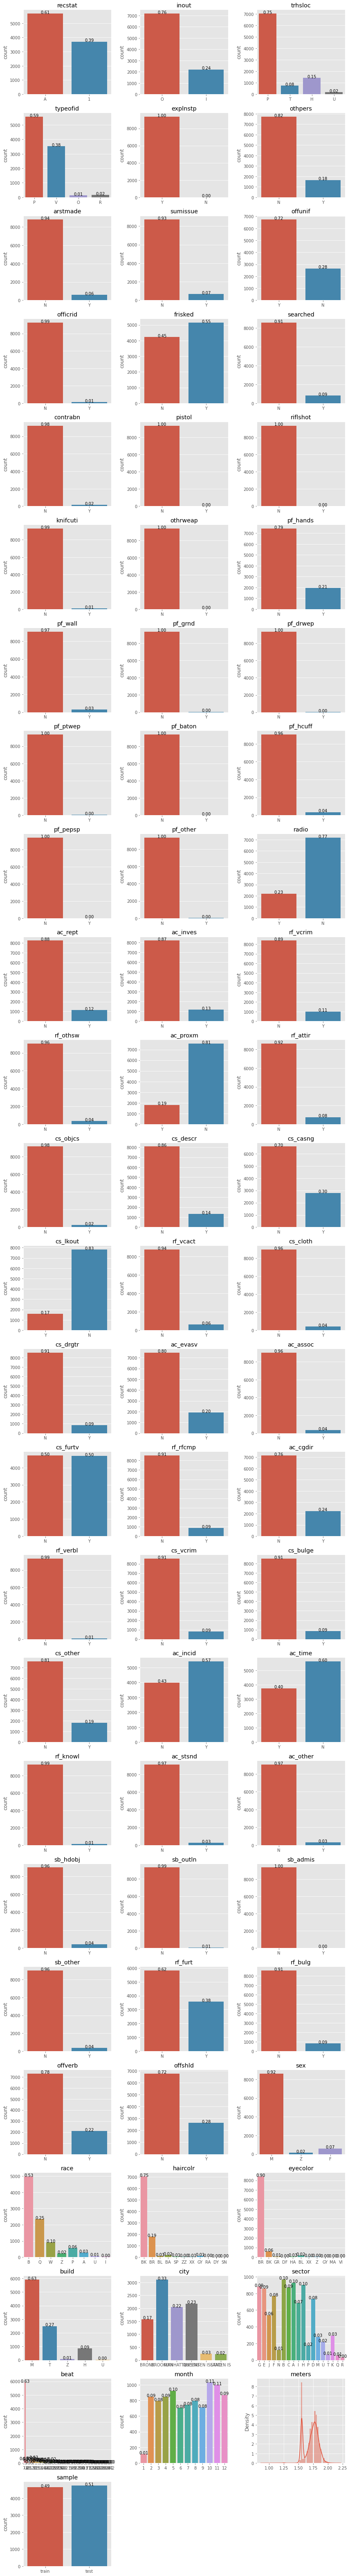

In [22]:
fn.distribution_plots(df)

Podemos observar que en la mayoria de las variables categoricas binarias hay un desbalance significativo de las clases.
Revisaremos ahora el vecor objetivo arstmade

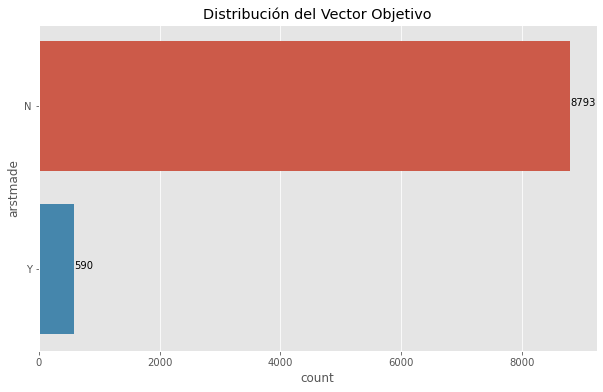

In [23]:
sns.countplot(y=df['arstmade'])

plt.title("Distribución del Vector Objetivo")
for index, value in enumerate(df['arstmade'].value_counts()): 
    plt.text(value, index, str(value)) 

plt.show()

Nuestro vector objetivo del primer objetivo a investigar también está muy desbalanceado. Podemos ver que 590 (un 6,3%) se concluyen como arrestos.

Para esta parte, hay quue generar el vector objetivo, ya que no se encuentra directamente en nuestro df.

4. Genere al menos cinco modelos predictivos que permitan determinar si el
procedimiento policial concluirá en alguna acción violenta.
○ Para ello, debe generar un nuevo atributo como vector objetivo que indique
cuándo hubo violencia o no. Éste debe ser creado a partir de atributos
existentes que indiquen el tipo de violencia.

Los atributos que tomaremos en cuenta son:

pf_hands: Fuerza física usada por el oficial-Manos (Cualitativa Nominal Binaria)

pf_wall: Fuerza física usada por el oficial-Sospechoso en tierra (Cualitativa Nominal Binaria)

pf_grnd: Fuerza física usada por el oficial-Sospechoso contra la pared (Cualitativa Nominal Binaria)

pf_drwep: Fuerza física usada por el oficial-Arma (Cualitativa Nominal Binaria)

pf_ptwep: Fuerza física usada por el oficial-Arma en punta (Cualitativa Nominal Binaria)

pf_baton: Fuerza física usada por el oficial-Bastón (Cualitativa Nominal Binaria)

pf_hcuff: Fuerza física usada por el oficial-Esposas (Cualitativa Nominal Binaria)

pf_pepsp: Fuerza física usada por el oficial-Spray de primienta (Cualitativa Nominal Binaria)

pf_other: Fuerza física usada por el oficial-Otros (Cualitativa Nominal Binaria)

Cuando estas variables sean 'Y', se contará como atributo de violencia.

In [24]:
# Creamos la columna violence, declarando 'N' por defecto y generamos un iterrows para revisar cada fila con 'Y'
df['violence'] = 'N'
for i, row in df.iterrows():
    if (row['pf_hands'] == 'Y') | (row['pf_wall'] == 'Y') | (
        row['pf_grnd'] == 'Y') | (row['pf_drwep'] == 'Y') | (
        row['pf_baton'] == 'Y') | (row['pf_hcuff'] == 'Y') | (
        row['pf_pepsp'] == 'Y') | (row['pf_other'] == 'Y'):

        df.loc[i, 'violence'] = 'Y'
#Revisamos la cantidad para cada clase:
print (df['violence'].value_counts())


N    7147
Y    2236
Name: violence, dtype: int64


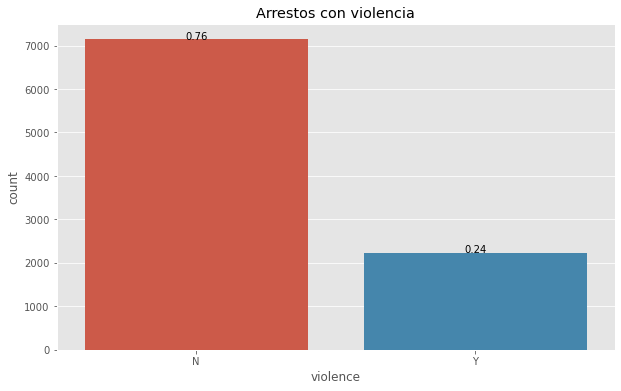

In [25]:
#Visualicemos la variable Violence
ax = sns.countplot(df['violence'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(df['violence'])), ha="center")
plt.title('Arrestos con violencia')
plt.show()

Podemos observar que un 24% de los arrestos son clasificados como violentos.

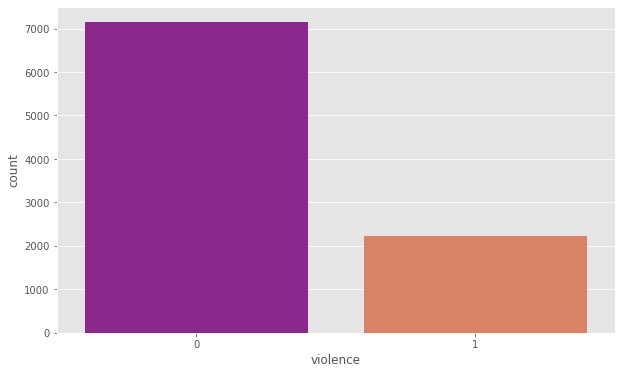

In [26]:
lbl = LabelEncoder()
df['violence'] = lbl.fit_transform(df['violence'])
sns.countplot(df['violence'], palette = 'plasma')
plt.show()

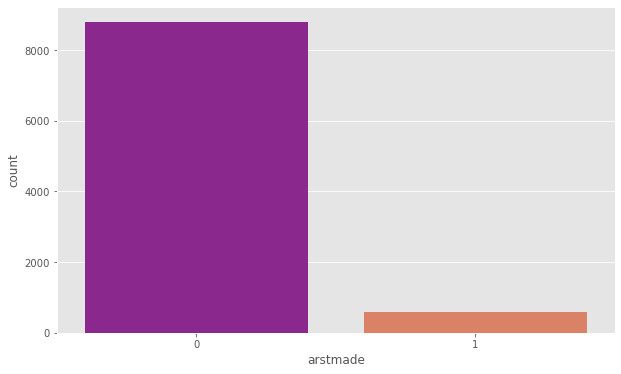

In [27]:
lbl = LabelEncoder()
df['arstmade'] = lbl.fit_transform(df['arstmade'])
sns.countplot(df['arstmade'], palette = 'plasma')
plt.show()

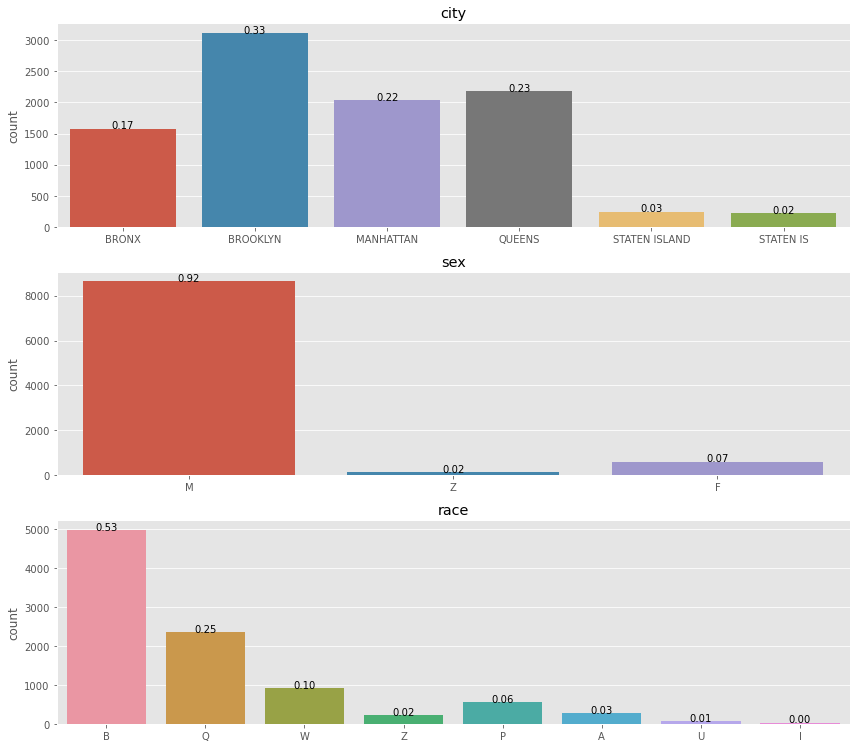

In [28]:
#Ahora veremos con detenimiento las variables city, sex y race en relación a la cantidad de arrestos
fn.distribution_plots_cat(df[['city', 'sex', 'race']])

In [29]:
#Para la recodificación de las variables,
#Primero generaremos una lista para las variables categóricas y otra para las variables numéricas
lista_cat = []
lista_num = []

for i in df.columns:
    if df.dtypes[i] == "object":
        lista_cat.append(i)
    else:
        lista_num.append(i)

print(f"Variables categóricas: {lista_cat}")
print("---------")
print(f"Variables numéricas: {lista_num}")

Variables categóricas: ['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat', 'sample']
---------
Variables numéricas: ['arstmade', 'month', 'meters', 'violence']


In [30]:
# Correción error en la base
df = df.replace('STATEN IS', 'STATEN ISLAND')

In [31]:
#Ahora voy a recodificar todas las variables categóricas a binarias con get_dummies
df2 =  pd.get_dummies(df, columns = lista_cat, dummy_na = False, prefix =None, prefix_sep='_' , drop_first=True )

In [32]:
df2.columns

Index(['arstmade', 'month', 'meters', 'violence', 'recstat_A', 'inout_O',
       'trhsloc_P', 'trhsloc_T', 'trhsloc_U', 'typeofid_P',
       ...
       'beat_42', 'beat_5', 'beat_6', 'beat_61', 'beat_62', 'beat_7', 'beat_8',
       'beat_9', 'beat_U', 'sample_train'],
      dtype='object', length=186)

In [35]:
X = df2.drop(columns = ['arstmade','sample_train'])
y = df2.arstmade

### Matrices de Entrenamiento y Validación

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,random_state=12238)

In [38]:
X_train
X_test
y_train
y_test

5240    0
2236    0
7574    0
6315    0
6905    0
       ..
683     1
79      0
6248    0
8372    0
7614    0
Name: arstmade, Length: 3097, dtype: int32

## Implementación de los modelos

In [39]:
# Modelo 1: Bernoulli NB

In [40]:
score_model = {}

In [41]:
%%time
parameters = {'alpha': [0,0.1,1],
              'fit_prior': [True,False]}


BN = BernoulliNB()

BN = GridSearchCV(BN, 
                  parameters, 
                  cv=5)

BN = BN.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {BN.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{BN.best_score_:.3f}'
)
score_model['BernoulliNB'] = BN.best_score_.round(3)
print('=='*40)

Best parameters {'alpha': 1, 'fit_prior': True}
Mean cross-validated accuracy score of the best_estimator: 0.945
CPU times: total: 3.03 s
Wall time: 1.96 s


In [42]:
BN = BernoulliNB(alpha=1.0, fit_prior=True).fit(X_train, y_train)
y_hat_BN = BN.predict(X_test)

cf_BN = confusion_matrix(y_test,y_hat_BN)
cf_BN

array([[2818,   89],
       [  57,  133]], dtype=int64)

In [43]:
c_BN = print(classification_report(y_test, y_hat_BN))
c_BN

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2907
           1       0.60      0.70      0.65       190

    accuracy                           0.95      3097
   macro avg       0.79      0.83      0.81      3097
weighted avg       0.96      0.95      0.95      3097



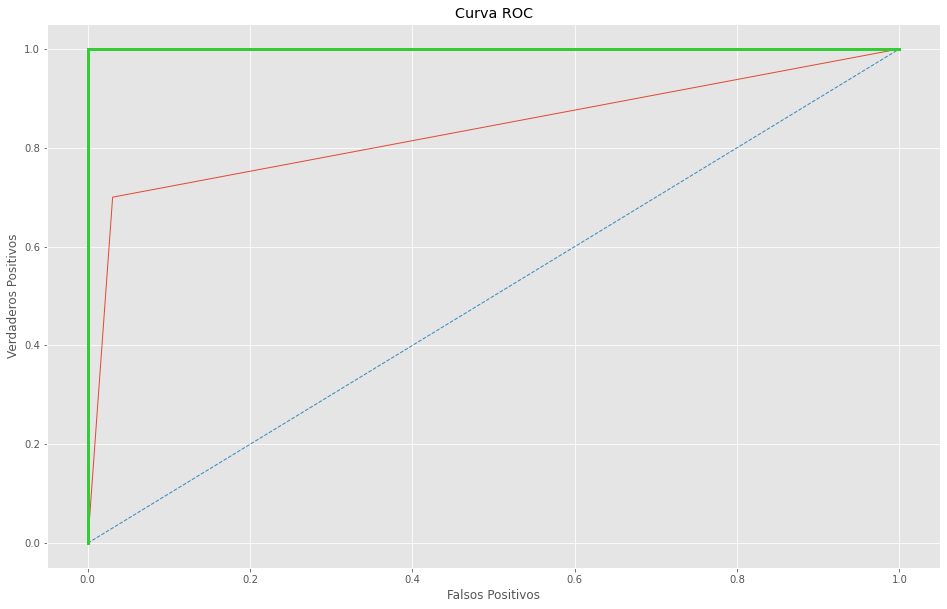

In [44]:
plt.figure(figsize= (16,10))
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_BN)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

# MOdelo 2: Random Forest Classifier

In [45]:
%%time
parameters = {"n_estimators": [5, 10, 15, 20, 25], 
              "max_depth": [3, 5, 7, 9, 11, 13]}

RF = RandomForestClassifier(
     random_state=11238,
     class_weight='balanced')

RF = GridSearchCV(
     RF, 
     parameters, 
     cv=5)

get_model_params_2 = RF.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {get_model_params_2.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{get_model_params_2.best_score_:.3f}'
)
score_model['Random Forest'] = get_model_params_2.best_score_.round(3)
print('=='*40)

Best parameters {'max_depth': 13, 'n_estimators': 15}
Mean cross-validated accuracy score of the best_estimator: 0.965
CPU times: total: 23.9 s
Wall time: 25.8 s


In [59]:
RF = RandomForestClassifier(max_depth = 13, n_estimators = 15).fit(X_train, y_train)
y_hat_RF = RF.predict(X_test)

c_RF = print(classification_report(y_test, y_hat_RF))
c_RF

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2907
           1       0.84      0.61      0.70       190

    accuracy                           0.97      3097
   macro avg       0.91      0.80      0.84      3097
weighted avg       0.97      0.97      0.97      3097



In [60]:
cf_RF = confusion_matrix(y_test,y_hat_RF)
cf_RF

array([[2885,   22],
       [  75,  115]], dtype=int64)

Text(0.5, 0, 'Falsos Positivos')

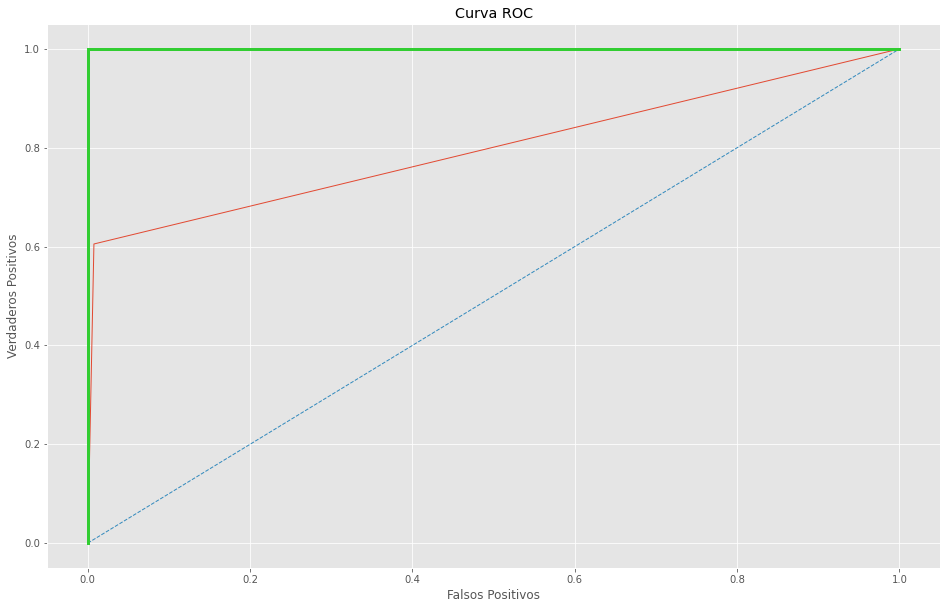

In [61]:
plt.figure(figsize= (16,10))
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_RF)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

# Modelo 3: Decision Tree Classifier

In [62]:
%%time
parameters = {"max_depth": [3, 5, 7, 9, 11, 13],
              'criterion': ['gini', 'entropy']}

DT = DecisionTreeClassifier(
     random_state=12238,
     class_weight='balanced')

DT = GridSearchCV(
     DT, 
     parameters, 
     cv=5)

DT.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {DT.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{DT.best_score_:.3f}'
)
score_model['Decision Tree Classifier'] = DT.best_score_.round(3)
print('=='*40)

Best parameters {'criterion': 'entropy', 'max_depth': 5}
Mean cross-validated accuracy score of the best_estimator: 0.946
CPU times: total: 6.45 s
Wall time: 6.57 s


In [65]:
DT = DecisionTreeClassifier(criterion='entropy',max_depth = 5,random_state=12238,class_weight="balanced").fit(X_train, y_train)
y_hat_DT = DT.predict(X_test)

reporte_DT = print(classification_report(y_test, y_hat_DT)) 
reporte_DT

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2907
           1       0.53      0.73      0.61       190

    accuracy                           0.94      3097
   macro avg       0.76      0.84      0.79      3097
weighted avg       0.95      0.94      0.95      3097



In [66]:
matriz_DT = confusion_matrix(y_test,y_hat_DT)
matriz_DT

array([[2783,  124],
       [  51,  139]], dtype=int64)

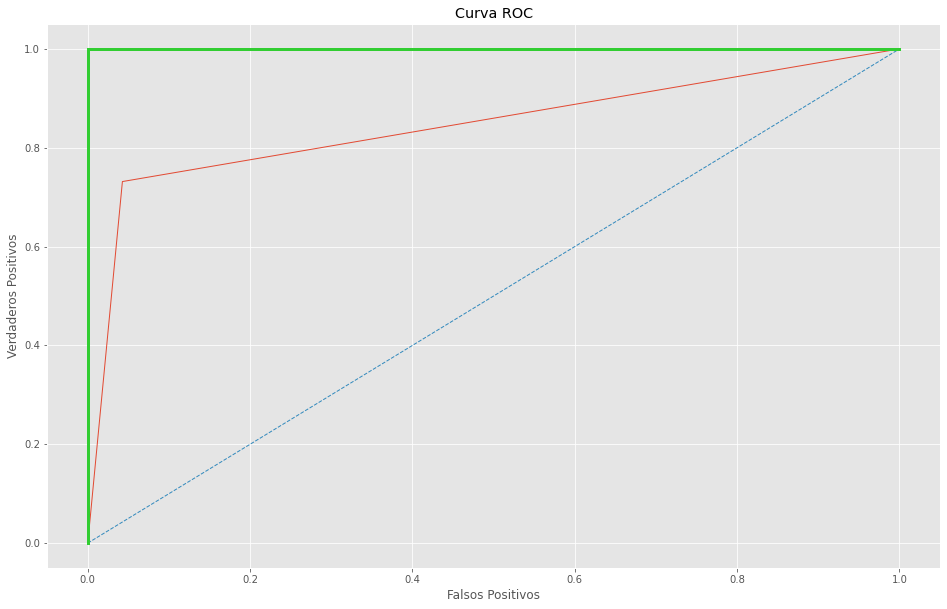

In [67]:
plt.figure(figsize= (16,10))
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_DT)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

# MOdelo 4: Logistic Regression

In [68]:
%%time
parameters = {"C": [0.001, 0.01, 0.1, 1.],
              "penalty": ["l1", "l2"]}

LR = LogisticRegression(
     random_state=12238,
     class_weight="balanced",
     solver="liblinear",
     n_jobs = -1)

LR = GridSearchCV(
     LR, 
     parameters, 
     cv=5)

LR =LR.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {LR.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{LR.best_score_:.3f}'
)
score_model['Logistic Regression'] = LR.best_score_.round(3)
print('=='*40)

Best parameters {'C': 0.001, 'penalty': 'l1'}
Mean cross-validated accuracy score of the best_estimator: 0.936
CPU times: total: 8.94 s
Wall time: 5.94 s


In [69]:
LR = LogisticRegression(C=0.001, penalty= 'l1',class_weight="balanced",solver="liblinear").fit(X_train, y_train)
y_hat_LR = LR.predict(X_test)

reporte_LR = print(classification_report(y_test, y_hat_LR)) 
reporte_LR

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2907
           1       0.00      0.00      0.00       190

    accuracy                           0.94      3097
   macro avg       0.47      0.50      0.48      3097
weighted avg       0.88      0.94      0.91      3097



In [70]:
matriz_LR = confusion_matrix(y_test,y_hat_LR)
matriz_LR

array([[2907,    0],
       [ 190,    0]], dtype=int64)

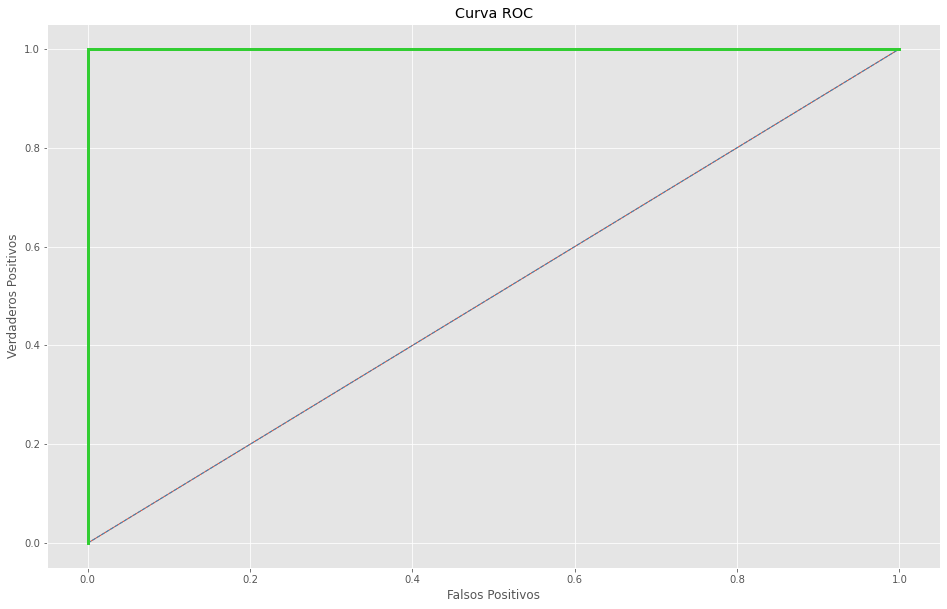

In [71]:
plt.figure(figsize= (16,10))
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_LR)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

# Modelo 5: AdaBoost Classifier

In [73]:
%%time
parameters = {"n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
              "learning_rate": [0.001, 0.01, 0.1, 1.]}

AB = AdaBoostClassifier(
     random_state=12238)

AB = GridSearchCV(
     AB, 
     parameters, 
     cv=5)

get_model_params_1 = AB.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {get_model_params_1.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{get_model_params_1.best_score_:.3f}'
)
score_model['Ada Boost'] = get_model_params_1.best_score_.round(3)
print('=='*40)

Best parameters {'learning_rate': 1.0, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.966
CPU times: total: 2min 5s
Wall time: 2min 10s


In [75]:
AB = AdaBoostClassifier(n_estimators = 5,learning_rate=1.0,random_state=11238).fit(X_train, y_train)
y_hat_AB = AB.predict(X_test)

reporte_AB = print(classification_report(y_test, y_hat_AB)) 
reporte_AB

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2907
           1       0.84      0.56      0.67       190

    accuracy                           0.97      3097
   macro avg       0.90      0.78      0.83      3097
weighted avg       0.96      0.97      0.96      3097



In [76]:
matriz_AB = confusion_matrix(y_test,y_hat_AB)
matriz_AB

array([[2886,   21],
       [  83,  107]], dtype=int64)

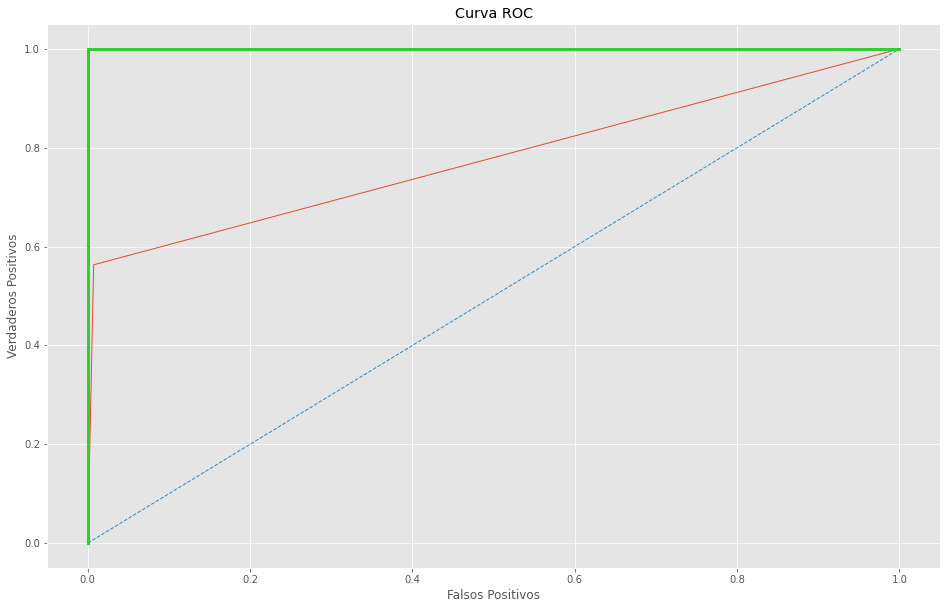

In [77]:
plt.figure(figsize= (16,10))
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_AB)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [78]:
models_sort = sorted(score_model.items())
models_sort

[('Ada Boost', 0.966),
 ('BernoulliNB', 0.945),
 ('Decision Tree Classifier', 0.946),
 ('Logistic Regression', 0.936),
 ('Random Forest', 0.965)]

Los mejores desempeños los tienen los modelos de Ada Boost y Random Forest

## Reporte comparativo del desempeño de los modelos

In [79]:
def plot_roc(model=DT, y_true=y_test, X_test=X_test, model_label=None):
    """TODO: Docstring for plot_roc.

    :model: TODO
    :y_true: TODO
    :X_test: TODO
    :model_label: TODO
    :returns: TODO

    """
    tmp_y_pred = model.predict_proba(X_test)[:, 1]
    false_positive_rates, true_positive_rates, _ = roc_curve(y_test, tmp_y_pred)
    store_auc = auc(false_positive_rates, true_positive_rates)
    if model_label is not None:
        tmp_label = "{}: {}".format(model_label, round(store_auc,3))
    else:
        tmp_label = None
    plt.plot(false_positive_rates, true_positive_rates, label=tmp_label)
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
    c='limegreen', lw=3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [80]:
Models = [AB,BN,LR,DT,RF]

for model in Models:
    y_hat = model.predict(X_test)
    print(model)
    print('\n')
    print(classification_report(y_test, y_hat))
    print(f'Confusion matrix --> {model}')
    print(confusion_matrix(y_test,y_hat))
    print('=='*40)

AdaBoostClassifier(n_estimators=5, random_state=11238)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2907
           1       0.84      0.56      0.67       190

    accuracy                           0.97      3097
   macro avg       0.90      0.78      0.83      3097
weighted avg       0.96      0.97      0.96      3097

Confusion matrix --> AdaBoostClassifier(n_estimators=5, random_state=11238)
[[2886   21]
 [  83  107]]
BernoulliNB()


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2907
           1       0.60      0.70      0.65       190

    accuracy                           0.95      3097
   macro avg       0.79      0.83      0.81      3097
weighted avg       0.96      0.95      0.95      3097

Confusion matrix --> BernoulliNB()
[[2818   89]
 [  57  133]]
LogisticRegression(C=0.001, class_weight='balanced', penalty='l1',
                   solver='liblinear')




# Serialización

In [81]:
models_sort

[('Ada Boost', 0.966),
 ('BernoulliNB', 0.945),
 ('Decision Tree Classifier', 0.946),
 ('Logistic Regression', 0.936),
 ('Random Forest', 0.965)]

In [82]:
pickle.dump(X_train, open('X_train.sav', 'wb'))
pickle.dump(X_test, open('X_test.sav', 'wb'))
pickle.dump(y_train, open('y_train.sav', 'wb'))
pickle.dump(y_test, open('y_test.sav', 'wb'))

In [83]:
pickle.dump(get_model_params_1.best_estimator_, open('modelo_AB.sav', 'wb'))
pickle.dump(get_model_params_2.best_estimator_, open('modelo_RF.sav', 'wb'))
